In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
df=pd.read_csv(r"C:\Users\Vansh\INFY.csv")
df=df.drop(['Symbol'],axis=1)
df=df.drop(['Series'],axis=1)
df=df.drop(['Prev Close'],axis=1)
df=df.drop(['Last'],axis=1)
df=df.drop(['VWAP'],axis=1)
df=df.drop(['Turnover'],axis=1)
df=df.drop(['Trades'],axis=1)
df=df.drop(['Deliverable Volume'],axis=1)
df=df.drop(['%Deliverble'],axis=1)
df

,Date,Open,High,Low,Close,Volume
0,03-01-2011,3444.00,3469.7,3427.70,3458.35,631068
1,04-01-2011,3457.00,3499.0,3457.00,3481.45,1014911
2,05-01-2011,3465.00,3477.0,3445.10,3459.60,440395
3,06-01-2011,3480.00,3493.0,3444.10,3478.15,586480
4,07-01-2011,3463.35,3495.0,3356.35,3370.75,1068866
...,...,...,...,...,...,...
2553,26-04-2021,1332.25,1351.3,1321.00,1343.55,7088606
2554,27-04-2021,1346.00,1353.0,1340.15,1348.50,3636115
2555,28-04-2021,1358.00,1359.5,1344.60,1356.00,4879234
2556,29-04-2021,1368.00,1369.0,1351.40,1356.35,5412357


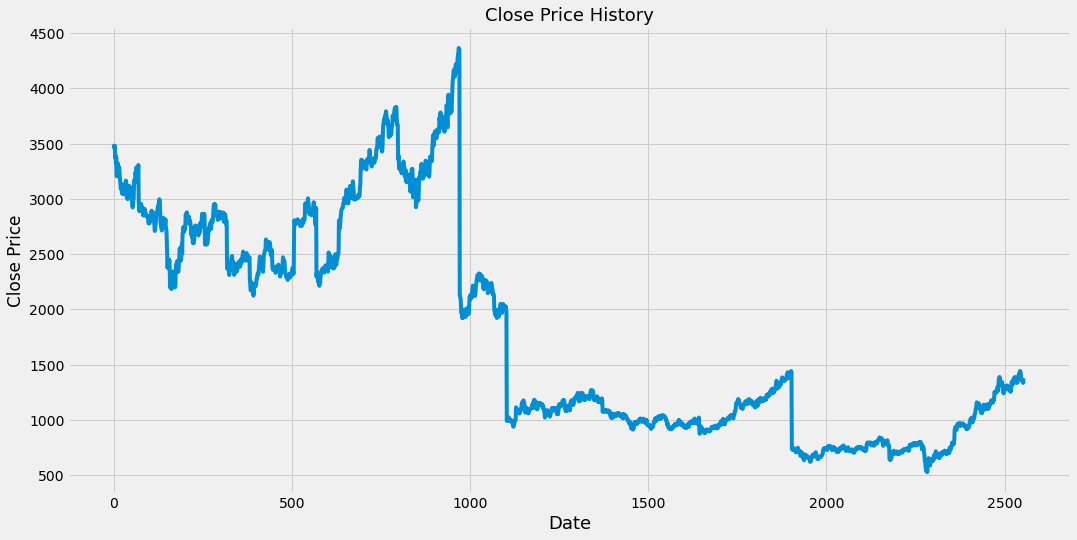

In [13]:
plt.figure(figsize=(16,8))
plt.title("Close Price History",fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.show()

In [14]:
def SMA(data,period=30,column='Close'):
    return data[column].rolling(window=period).mean()

In [15]:
df['SMA20'] = SMA(df, 20)
df['SMA50'] = SMA(df, 50)

In [16]:
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

In [17]:
df['Buy']=np.where(df['Position']==1,df['Close'],np.nan)
df['Sell']=np.where(df['Position']==-1,df['Close'],np.nan)

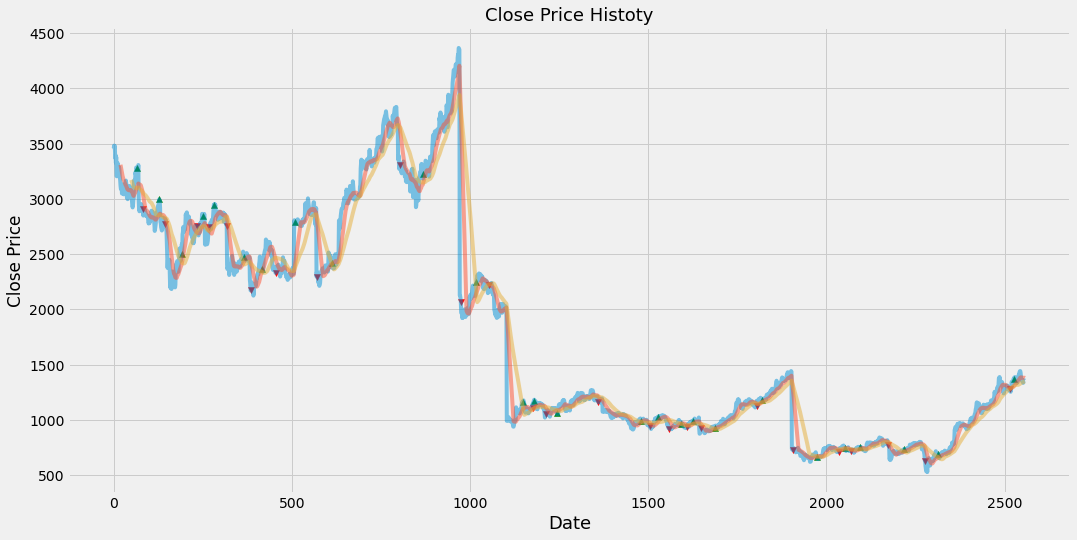

In [18]:
plt.figure(figsize=(16,8))
plt.title("Close Price Histoty",fontsize=18)
plt.plot(df['Close'],alpha=0.5,label='Close')
plt.plot(df['SMA20'],alpha=0.5,label='SMA 20')
plt.plot(df['SMA50'],alpha=0.5,label='SMA 50')
plt.scatter(df.index,df['Buy'],alpha=1,label='Buy Signal',marker='^',color='green')
plt.scatter(df.index,df['Sell'],alpha=1,label='Sell Signal',marker='v',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.show()